In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from src.forecast.utils import *
from src.forecast.deeplearning import DeepLearningModel, scale_data, time_series_to_X_y, plot_predictions

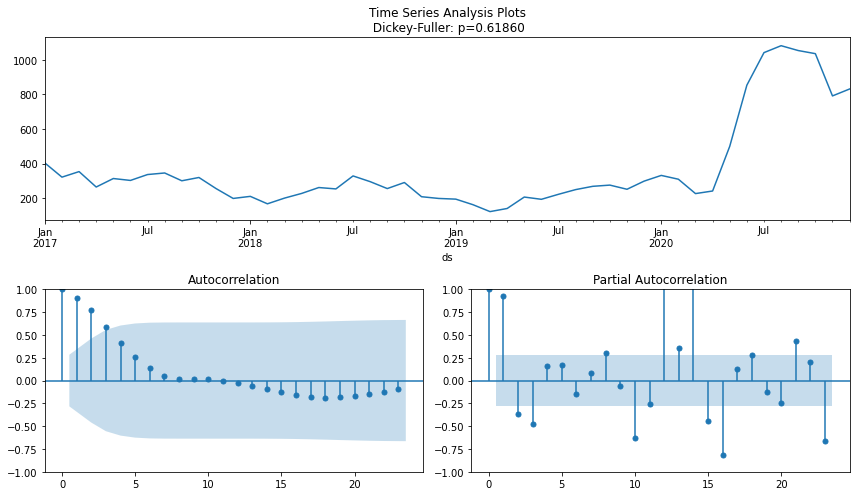

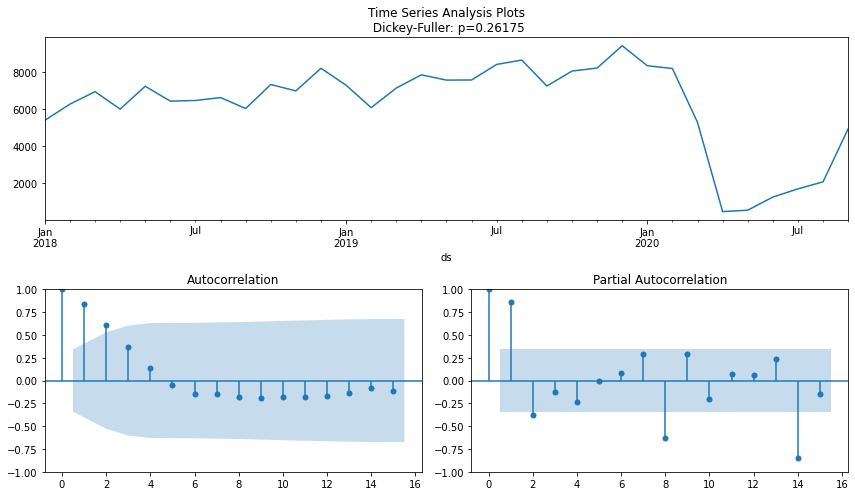

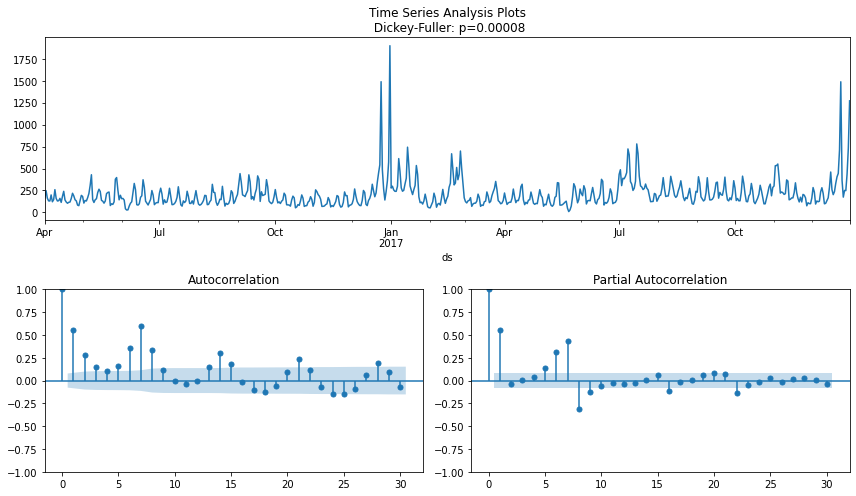

In [2]:
df_paths = ["data/producto_A.csv", "data/producto_B.csv", "data/producto_C.csv"]

for i in df_paths:
    df = get_data(i)
    df.set_index("ds", inplace=True)
    max_lags = min(int(len(df) / 2) - 1, 30)
    tsplot(df.y, lags=max_lags)

## Producto A
Pronóstico de demanda mensual de producto orgánico natural para la salud comercializado a través de canales minoristas en Perú.

In [3]:
df = get_data("data/producto_A.csv")
df.shape

(48, 2)

## Producto C:
Pronóstico de demanda diaria de bebida carbonatada comercializada a través de canales minoristas en Ecuador.

In [4]:
df = get_data("data/producto_C.csv")
df.shape

(640, 2)

### Deep Learning Model (CNN)

In [5]:
train, val, test = time_series_split(df, n_val=60, n_test=30)
data_scaled, scaler = scale_data([train, val, test], scaler_type="standard")
train_set, val_set, test_set = time_series_to_X_y(data_scaled, window_size=7)

In [6]:
model = DeepLearningModel("CNN", filters=200, window_size=7)
model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 200)            600       
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 20)                24020     
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,641
Trainable params: 24,641
Non-trainable params: 0
_________________________________________________________________


2022-01-09 13:29:26.214083: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.fit(train_set, val_set, epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 8ms/step - loss: 1.0220 - root_mean_squared_error: 1.0109 - val_loss: 0.5162 - val_root_mean_squared_error: 0.7185
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.8657 - root_mean_squared_error: 0.9304 - val_loss: 0.4369 - val_root_mean_squared_error: 0.6610
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.7549 - root_mean_squared_error: 0.8688 - val_loss: 0.3845 - val_root_mean_squared_error: 0.6201
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6924 - root_mean_squared_error: 0.8321 - val_loss: 0.3480 - val_root_mean_squared_error: 0.5899
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6401 - root_mean_squared_error: 0.8001 - val_loss: 0.3276 - val_root_mean_squared_error: 0.5724
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - root_mean_squared_error: 0.7763 - val_loss: 0.3118 - val_root_mean_sq

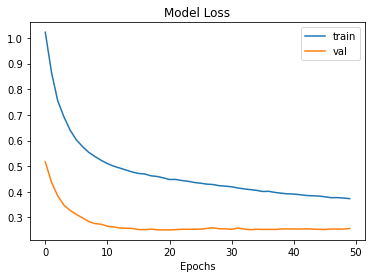

In [8]:
model.plot_loss_function()

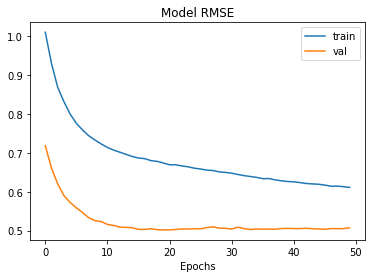

In [9]:
model.plot_rmse_function()

RMSE: 89.96
MAPE: 28.77%
MASE: 68.28%


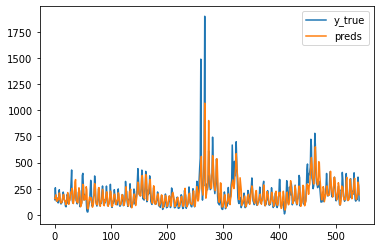

In [10]:
# Train preds

X_train, y_train = train_set
y_preds = model.predict(X_train)

plot_predictions(y_train, y_preds, scaler)

RMSE: 74.99
MAPE: 25.39%
MASE: 82.36%


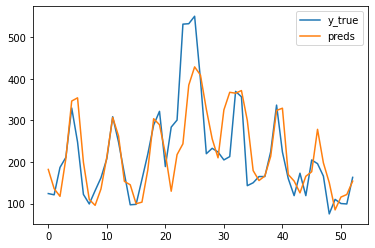

In [13]:
# Validation preds

X_val, y_val = val_set
y_preds = model.predict(X_val)

plot_predictions(y_val, y_preds, scaler)

RMSE: 247.62
MAPE: 26.26%
MASE: 61.20%


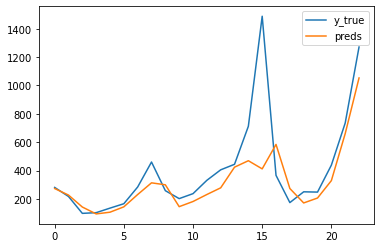

In [14]:
# Test preds

X_test, y_test = test_set
y_preds = model.predict(X_test)

plot_predictions(y_test, y_preds, scaler)